In [1]:
import pandas as pd
import json
import os
import psutil
import missingno

In [2]:
final_columns = [
    'fechaCaptura',
    'nombres', 
    'primerApellido',
    'segundoApellido',
    'nivelResponsabilidad',
    'tipoProcedimiento',
    'institucionDependencia.nombre',
    'puesto.nombre',
]

In [3]:
path = './raw_data/s2/CHIAPAS'

In [4]:
data_dict = {}
with os.scandir(path) as files:
    for entry in files:
        with open(os.path.join(path, entry.name), 'r') as f:
            file_data = json.load(f)
            data_dict[entry.name[-8:-5]] = file_data

In [5]:
json_names = [k for k in data_dict.keys()]

In [6]:
data_frames=[]
for name in json_names:
    data_frames.append(
        pd.json_normalize(
                    data_dict[name],
                    record_path=None,
                    meta=None, 
                    meta_prefix=None, 
                    record_prefix=None, 
                    errors='raise', 
                    sep='.', 
                    max_level=None,
                    )
        )

In [7]:
for frame in data_frames:
    print(frame.shape)

(11, 23)


In [10]:
data_frames[0].head()

,id,fechaCaptura,ejercicioFiscal,nombres,primerApellido,segundoApellido,tipoArea,nivelResponsabilidad,tipoProcedimiento,ramo.clave,...,institucionDependencia.nombre,institucionDependencia.siglas,institucionDependencia.clave,puesto.nivel,puesto.nombre,superiorInmediato.nombres,superiorInmediato.primerApellido,superiorInmediato.segundoApellido,superiorInmediato.puesto.nivel,superiorInmediato.puesto.nombre
0,a19aceea-a95b-401e-92ad-22635d71a903,2022-07-22T13:54:33Z,2021,JORGE ALBERTO,NAFATE,POZO,"[{'clave': 'C', 'valor': 'CONTRATANTE'}, {'cla...","[{'clave': 'A', 'valor': 'ATENCIÓN'}, {'clave'...","[{'clave': 1, 'valor': 'CONTRATACIONES PÚBLICA...",28,...,Secretaría Ejecutiva del Sistema Anticorrupció...,SESAECH,71,MANDO MEDIO,JEFE DE LA UNIDAD DE APOYO ADMINISTRATIVO,DAYANHARA,AGUILAR,BALLINAS,MANDO MEDIO SUPERIOR,SECRETARIA TÉCNICA
1,cb7a58a3-7681-4182-8059-4acaaa814259,2022-07-22T13:59:51Z,2022,KENIA LIZBETH,JIMENEZ,ALEGRIA,"[{'clave': 'C', 'valor': 'CONTRATANTE'}, {'cla...","[{'clave': 'A', 'valor': 'ATENCIÓN'}, {'clave'...","[{'clave': 3, 'valor': 'ENAJENACIÓN DE BIENES ...",28,...,Secretaría Ejecutiva del Sistema Anticorrupció...,SESAECH,71,MANDO MEDIO,COORDINADORA DE ARCHIVO,DAYANHARA,AGUILAR,BALLINAS,MANDO MEDIO SUPERIOR,SECRETARIA TÉCNICA
2,b754b41c-bb63-422e-b3b5-74cf586ea078,2022-07-22T14:06:46Z,2022,DAYANHARA,AGUILAR,BALLINAS,"[{'clave': 'R', 'valor': 'REQUIRENTE'}]","[{'clave': 'T', 'valor': 'TRAMITACIÓN'}]","[{'clave': 1, 'valor': 'CONTRATACIONES PÚBLICA...",28,...,Secretaría Ejecutiva del Sistema Anticorrupció...,SESAECH,71,MANDO MEDIO,SECRETARIA TÉCNICA,NA,NA,NA,NA,NA
3,a85c1c6f-4bbe-470c-afd6-87e977e16e07,2022-07-22T14:09:50Z,2022,ANA ISABEL,RAMON,LAGUNA,"[{'clave': 'C', 'valor': 'CONTRATANTE'}, {'cla...","[{'clave': 'A', 'valor': 'ATENCIÓN'}, {'clave'...","[{'clave': 3, 'valor': 'ENAJENACIÓN DE BIENES ...",28,...,Secretaría Ejecutiva del Sistema Anticorrupció...,SESAECH,71,MANDO MEDIO,JEFE DE LA UNIDAD DE APOYO ADMINISTRATIVO,DAYANHARA,AGUILAR,BALLINAS,MANDO MEDIO SUPERIOR,SECRETARIA TÉCNICA
4,49ffd1a8-1993-4e19-9ac8-a13e5e51a8cd,2022-07-22T14:21:08Z,2022,JULIO CESAR,GARCIA,BENITEZ,"[{'clave': 'C', 'valor': 'CONTRATANTE'}, {'cla...","[{'clave': 'A', 'valor': 'ATENCIÓN'}, {'clave'...","[{'clave': 1, 'valor': 'CONTRATACIONES PÚBLICA...",28,...,Secretaría Ejecutiva del Sistema Anticorrupció...,SESAECH,71,MANDO MEDIO,DIRECTOR DE EVALUACION Y POLITICAS PUBLICAS,DAYANHARA,AGUILAR,BALLINAS,MANDO MEDIO SUPERIOR,SECRETARIA TÉCNICA


In [11]:
data_frames2 = []
for frame in data_frames:
    data_frames2.append(frame[frame.columns.intersection(final_columns)])

In [12]:
final = pd.concat([f for f in data_frames2], axis=0)

In [18]:
final.head()

,fechaCaptura,nombres,primerApellido,segundoApellido,nivelResponsabilidad,tipoProcedimiento,institucionDependencia.nombre,puesto.nombre
0,2022-07-22T13:54:33Z,JORGE ALBERTO,NAFATE,POZO,"[{'clave': 'A', 'valor': 'ATENCIÓN'}, {'clave'...","[{'clave': 1, 'valor': 'CONTRATACIONES PÚBLICA...",Secretaría Ejecutiva del Sistema Anticorrupció...,JEFE DE LA UNIDAD DE APOYO ADMINISTRATIVO
1,2022-07-22T13:59:51Z,KENIA LIZBETH,JIMENEZ,ALEGRIA,"[{'clave': 'A', 'valor': 'ATENCIÓN'}, {'clave'...","[{'clave': 3, 'valor': 'ENAJENACIÓN DE BIENES ...",Secretaría Ejecutiva del Sistema Anticorrupció...,COORDINADORA DE ARCHIVO
2,2022-07-22T14:06:46Z,DAYANHARA,AGUILAR,BALLINAS,"[{'clave': 'T', 'valor': 'TRAMITACIÓN'}]","[{'clave': 1, 'valor': 'CONTRATACIONES PÚBLICA...",Secretaría Ejecutiva del Sistema Anticorrupció...,SECRETARIA TÉCNICA
3,2022-07-22T14:09:50Z,ANA ISABEL,RAMON,LAGUNA,"[{'clave': 'A', 'valor': 'ATENCIÓN'}, {'clave'...","[{'clave': 3, 'valor': 'ENAJENACIÓN DE BIENES ...",Secretaría Ejecutiva del Sistema Anticorrupció...,JEFE DE LA UNIDAD DE APOYO ADMINISTRATIVO
4,2022-07-22T14:21:08Z,JULIO CESAR,GARCIA,BENITEZ,"[{'clave': 'A', 'valor': 'ATENCIÓN'}, {'clave'...","[{'clave': 1, 'valor': 'CONTRATACIONES PÚBLICA...",Secretaría Ejecutiva del Sistema Anticorrupció...,DIRECTOR DE EVALUACION Y POLITICAS PUBLICAS


<AxesSubplot: >

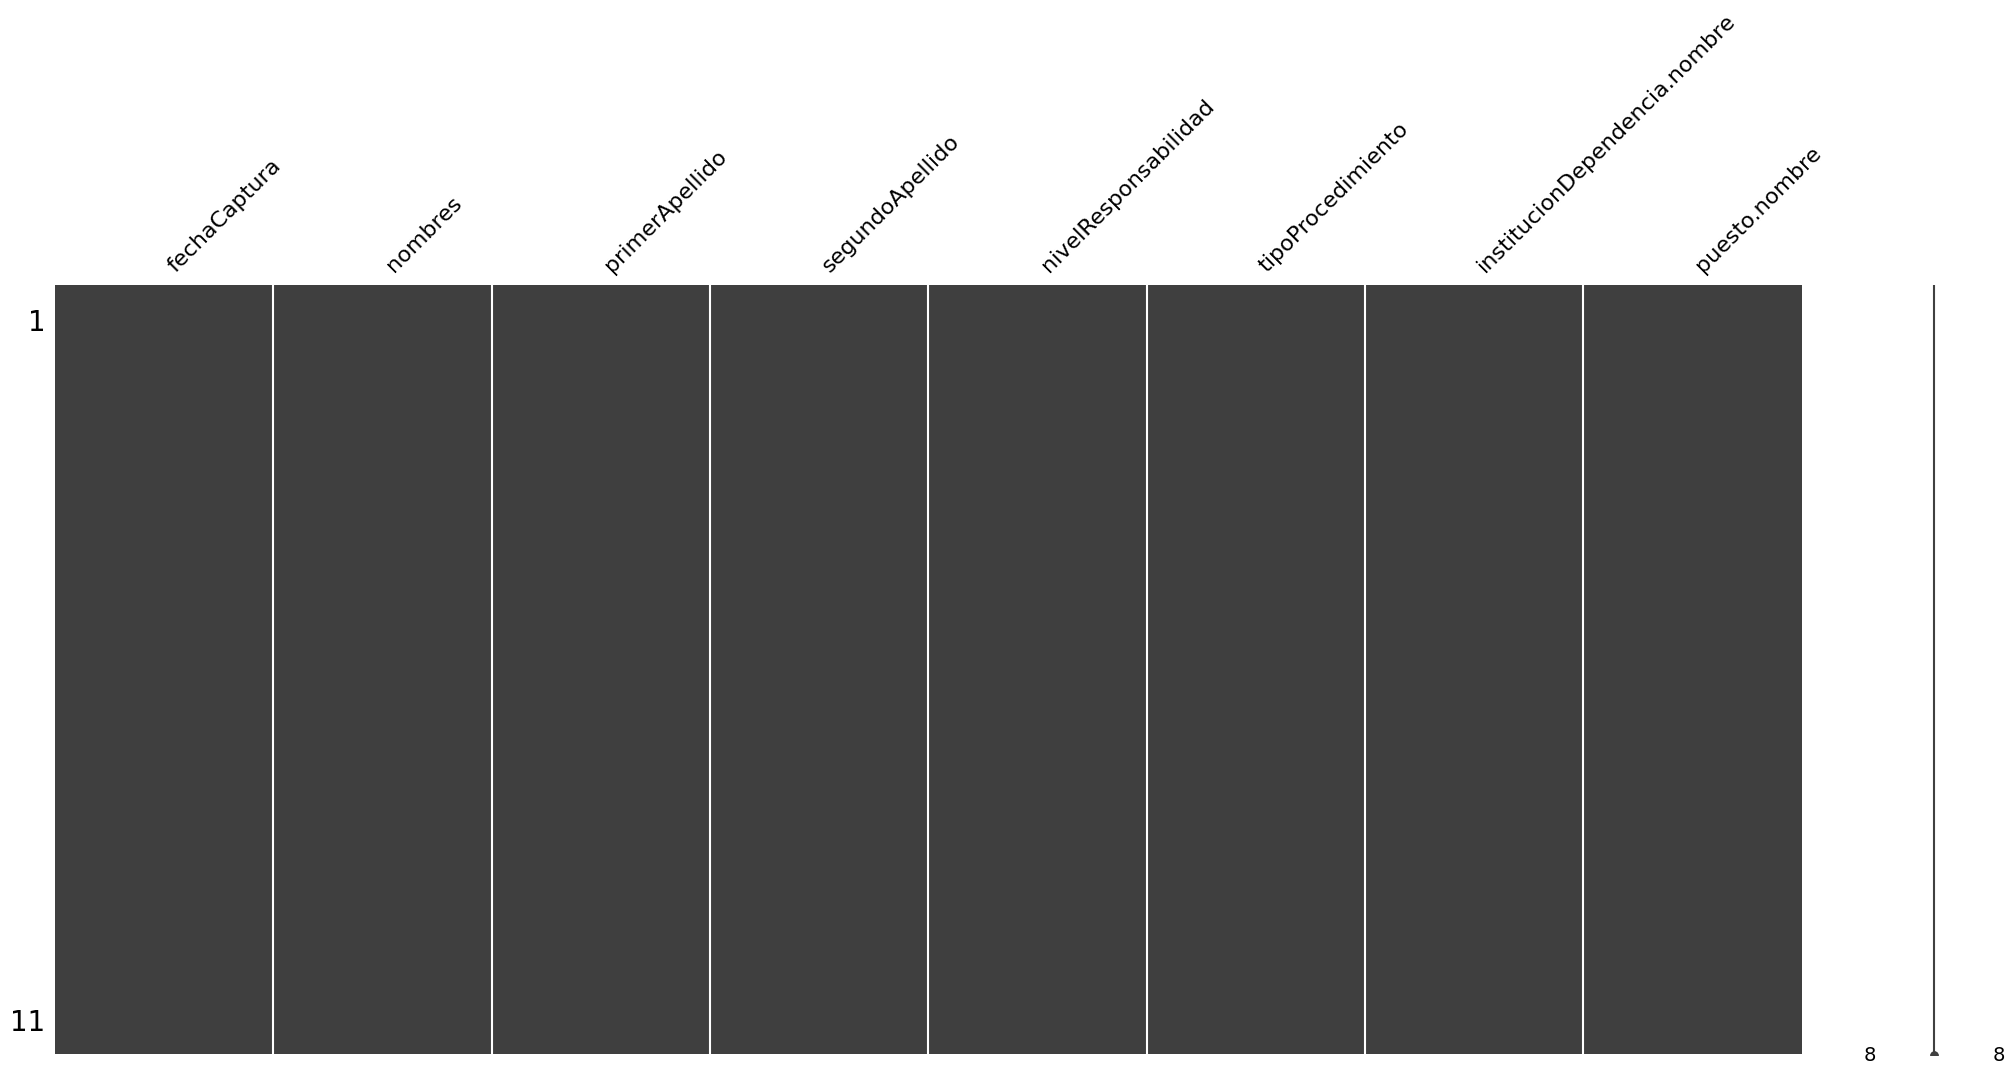

In [22]:
missingno.matrix(final)

In [21]:
final.to_csv('s2_chiapas_v1.csv')